In [1]:
#pip install mplfinance

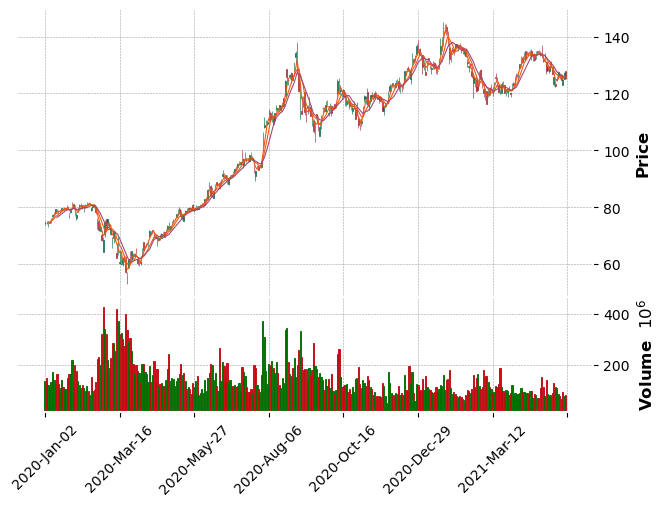

In [2]:
## PACKAGES WE NEED ##

#METHOD 1
import pandas as pd
import numpy as np
import datetime as dt
import mplfinance as mpf
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Define time frame

#we can code it to ask the Company Ticker Symbol
company = 'AAPL'

start = dt.datetime(2020,1,1)
end = dt.datetime.now()

#Load data
data = web.DataReader(company,'yahoo',start,end)
#print(data.columns)
#date column is the index

#restructure data
data = data[['Open','High','Low','Close','Volume']]
mpf.plot(data,type='candle',mav=(3,6,9),volume=True,style='charles')

#https://pypi.org/project/mplfinance/ -- for more info

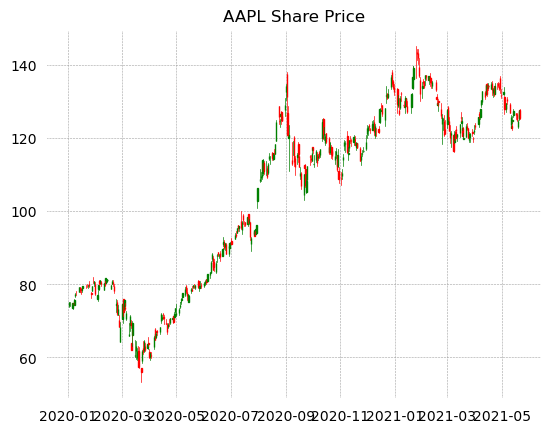

In [3]:
#Method 2

from mplfinance.original_flavor import candlestick_ohlc
data = web.DataReader(company,'yahoo',start,end)


#restructure data
data = data[['Open','High','Low','Close']]
data.reset_index(inplace=True)

data['Date'] = data['Date'].map(mdates.date2num)

#plot the data

ax = plt.subplot() #Candle stick takes first parameter as subplot
ax.grid(True)#get a grid in the chart
ax.set_axisbelow(True)
ax.set_facecolor('white')#background of the chart
ax.xaxis_date() #we need the number format for candlestick to plot dates
ax.tick_params(axis='x',color='white')
ax.tick_params(axis='y',color='white')
plt.rcParams['figure.figsize'] = [15,8]
ax.set_title(f'{company} Share Price')
candlestick_ohlc(ax,data.values,width=0.4,colorup='g')
plt.show()